[View in Colaboratory](https://colab.research.google.com/github/azgar-taj/Deep-Learning-Machine-Learning/blob/master/DigitDetection.ipynb)

In [0]:
##importing required packages
from keras.layers import Dense
from keras.models import Sequential 
from keras.datasets import mnist
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from PIL import Image
from google.colab import files

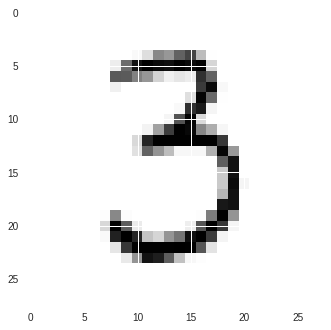

In [227]:
##Importing the Dataset
(X_train,y_train),(X_test,y_test)=mnist.load_data()
##Visualising an example from given data
plt.imshow(X_train[50])

In [0]:
##Normalizing Data
X_train_arr=X_train.reshape(X_train.shape[0],28*28)/255
X_test_arr=X_test.reshape(X_test.shape[0],28*28)/255
##One-Hot Coding 
y_test_arr=to_categorical(y_test)
y_train_arr=to_categorical(y_train)

In [230]:
##Model Initialization and Training
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(n_col,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
early_stopping=EarlyStopping(patience=2)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_arr,y_train_arr,validation_data=(X_test_arr,y_test_arr),epochs=30,callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 144us/step - loss: 0.2379 - acc: 0.9302 - val_loss: 0.1226 - val_acc: 0.9619
Epoch 2/30
60000/60000 [==============================] - 8s 125us/step - loss: 0.1054 - acc: 0.9679 - val_loss: 0.1009 - val_acc: 0.9706
Epoch 3/30
40736/60000 [===================>..........] - ETA: 2s - loss: 0.0699 - acc: 0.9787

60000/60000 [==============================] - 8s 129us/step - loss: 0.0740 - acc: 0.9774 - val_loss: 0.0794 - val_acc: 0.9757
Epoch 4/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.0560 - acc: 0.9815 - val_loss: 0.0822 - val_acc: 0.9755
Epoch 5/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.0447 - acc: 0.9855 - val_loss: 0.0837 - val_acc: 0.9740


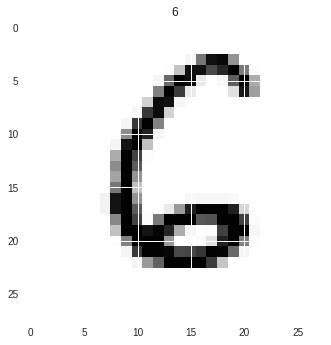

In [235]:
##Prediction of data on Test Set
pred=model.predict(X_test[98].reshape(1,28*28)).argmax()
plt.title(pred)
plt.imshow(X_test[98])

In [232]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_88 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_89 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [219]:
##Appilcation on Real Data
uploadfreq=files.upload()

Saving test11.jpg to test11.jpg


In [225]:
##Data Processing
img1=Image.open('test11.jpg')
img2=img1.resize((28,28))
img2_bw = img2.convert('L')
img2_arr=np.array(img2_bw).reshape(1,28*28)
model.predict(img2_arr)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)